In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Pandas version: 2.3.3
NumPy version: 2.3.5


In [2]:
# Define column names for the dataset
# The NASA dataset doesn't have headers, so we need to define them

index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = [f'sensor_{i}' for i in range(1, 22)]  # 21 sensors
column_names = index_names + setting_names + sensor_names

# Load training data
train_df = pd.read_csv('../data/train_FD001.txt', 
                       sep=' ',           # Space-separated values
                       header=None,       # No header row in file
                       names=column_names,
                       index_col=False)

# Remove extra columns (the file has trailing spaces creating empty columns)
train_df = train_df.dropna(axis=1, how='all')

print(f"Training data loaded successfully!")
print(f"Shape: {train_df.shape}")
print(f"\nFirst few rows:")
train_df.head()

Training data loaded successfully!
Shape: (20631, 26)

First few rows:


,unit_number,time_cycles,setting_1,setting_2,setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [4]:
# Display detailed information about the dataset
print("-"*60)
print("DATASET INFORMATION")
print("-"*60)

print(f"\nTotal rows: {train_df.shape[0]:,}")
print(f"Total columns: {train_df.shape[1]}")

print(f"\nNumber of unique engines: {train_df['unit_number'].nunique()}")
print(f"\nEngine IDs range: {train_df['unit_number'].min()} to {train_df['unit_number'].max()}")

print("\n" + "-"*60)
print("COLUMN NAMES")
print("-"*60)
print(train_df.columns.tolist())

print("\n" + "-"*60)
print("DATA TYPES")
print("-"*60)
print(train_df.dtypes)

print("\n" + "-"*60)
print("MISSING VALUES")
print("-"*60)
print(f"Total missing values: {train_df.isnull().sum().sum()}")

------------------------------------------------------------
DATASET INFORMATION
------------------------------------------------------------

Total rows: 20,631
Total columns: 26

Number of unique engines: 100

Engine IDs range: 1 to 100

------------------------------------------------------------
COLUMN NAMES
------------------------------------------------------------
['unit_number', 'time_cycles', 'setting_1', 'setting_2', 'setting_3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21']

------------------------------------------------------------
DATA TYPES
------------------------------------------------------------
unit_number      int64
time_cycles      int64
setting_1      float64
setting_2      float64
setting_3      float64
sensor_1       float64
sensor_2       floa

------------------------------------------------------------
ENGINE LIFECYCLE ANALYSIS
------------------------------------------------------------

Average engine lifetime: 206.3 cycles
Shortest lifetime: 128 cycles
Longest lifetime: 362 cycles
Standard deviation: 46.3 cycles

------------------------------------------------------------
LIFECYCLE DISTRIBUTION
------------------------------------------------------------
count    100.000000
mean     206.310000
std       46.342749
min      128.000000
25%      177.000000
50%      199.000000
75%      229.250000
max      362.000000
Name: time_cycles, dtype: float64


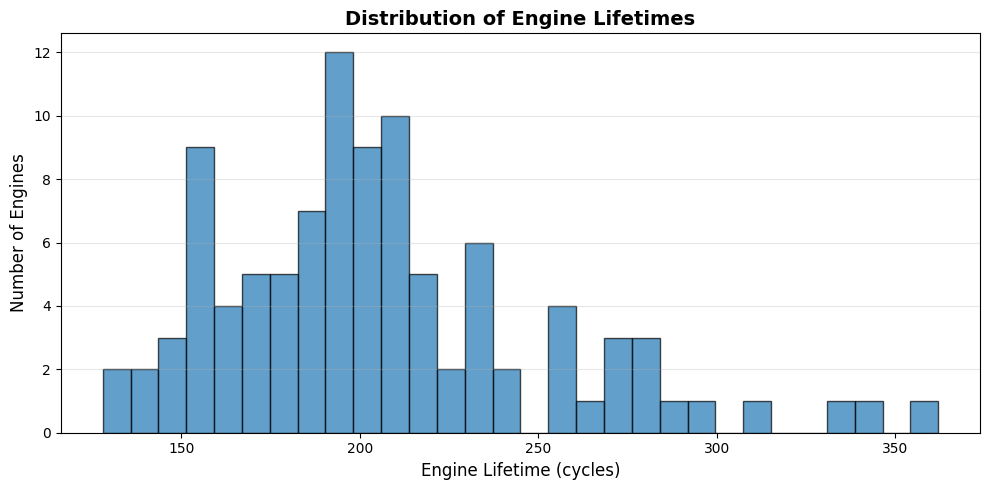


Interpretation: Each engine ran until failure.
We have run-to-failure data from 100 engines.


In [5]:
# Calculate lifecycle length for each engine
engine_lifecycles = train_df.groupby('unit_number')['time_cycles'].max()

print("-"*60)
print("ENGINE LIFECYCLE ANALYSIS")
print("-"*60)

print(f"\nAverage engine lifetime: {engine_lifecycles.mean():.1f} cycles")
print(f"Shortest lifetime: {engine_lifecycles.min()} cycles")
print(f"Longest lifetime: {engine_lifecycles.max()} cycles")
print(f"Standard deviation: {engine_lifecycles.std():.1f} cycles")

print("\n" + "-"*60)
print("LIFECYCLE DISTRIBUTION")
print("-"*60)
print(engine_lifecycles.describe())

# Visualize lifecycle distribution
plt.figure(figsize=(10, 5))
plt.hist(engine_lifecycles, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Engine Lifetime (cycles)', fontsize=12)
plt.ylabel('Number of Engines', fontsize=12)
plt.title('Distribution of Engine Lifetimes', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nInterpretation: Each engine ran until failure.")
print(f"We have run-to-failure data from {len(engine_lifecycles)} engines.")

------------------------------------------------------------
EXAMINING ENGINE #1
------------------------------------------------------------

Total cycles until failure: 192
Number of measurements: 192

First 3 measurements:
   unit_number  time_cycles  setting_1  setting_2  setting_3  sensor_1  \
0            1            1    -0.0007    -0.0004      100.0    518.67   
1            1            2     0.0019    -0.0003      100.0    518.67   
2            1            3    -0.0043     0.0003      100.0    518.67   

   sensor_2  sensor_3  sensor_4  sensor_5  sensor_6  sensor_7  sensor_8  \
0    641.82   1589.70   1400.60     14.62     21.61    554.36   2388.06   
1    642.15   1591.82   1403.14     14.62     21.61    553.75   2388.04   
2    642.35   1587.99   1404.20     14.62     21.61    554.26   2388.08   

   sensor_9  sensor_10  sensor_11  sensor_12  sensor_13  sensor_14  sensor_15  \
0   9046.19        1.3      47.47     521.66    2388.02    8138.62     8.4195   
1   9044.07   

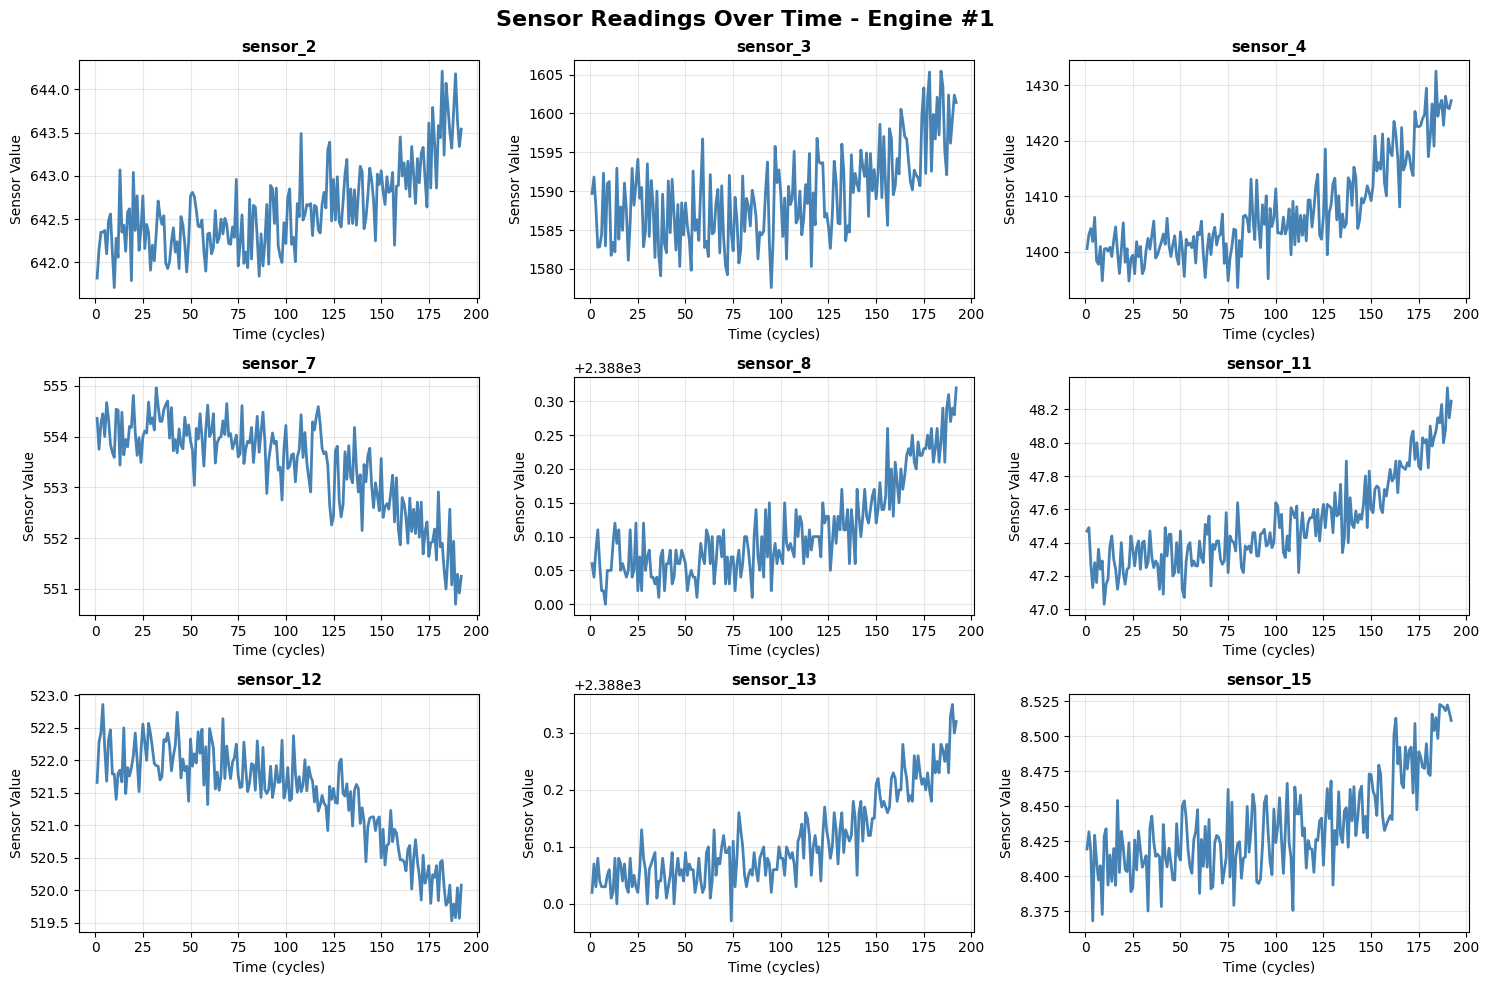


Observation: Notice how some sensors show clear degradation trends
(increasing or decreasing values as the engine approaches failure)


In [6]:
# Look at one engine's sensor data over time
sample_engine = 1

# Filter data for one engine
engine_1_data = train_df[train_df['unit_number'] == sample_engine]

print("-"*60)
print(f"EXAMINING ENGINE #{sample_engine}")
print("-"*60)
print(f"\nTotal cycles until failure: {engine_1_data['time_cycles'].max()}")
print(f"Number of measurements: {len(engine_1_data)}")
print(f"\nFirst 3 measurements:")
print(engine_1_data.head(3))

# Plot sensor readings over time for this engine
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
fig.suptitle(f'Sensor Readings Over Time - Engine #{sample_engine}', 
             fontsize=16, fontweight='bold')

# Plot first 9 sensors
for idx, sensor in enumerate(['sensor_2', 'sensor_3', 'sensor_4', 'sensor_7', 
                               'sensor_8', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_15']):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].plot(engine_1_data['time_cycles'], 
                        engine_1_data[sensor], 
                        linewidth=2, color='steelblue')
    axes[row, col].set_xlabel('Time (cycles)', fontsize=10)
    axes[row, col].set_ylabel('Sensor Value', fontsize=10)
    axes[row, col].set_title(sensor, fontsize=11, fontweight='bold')
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\nObservation: Notice how some sensors show clear degradation trends")
print("(increasing or decreasing values as the engine approaches failure)")

------------------------------------------------------------
SENSOR VARIABILITY ANALYSIS
------------------------------------------------------------

Sensors with very low variability (likely not useful):
['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']

Sensors with high variability (potentially useful):
['sensor_3', 'sensor_4', 'sensor_9', 'sensor_14', 'sensor_17']


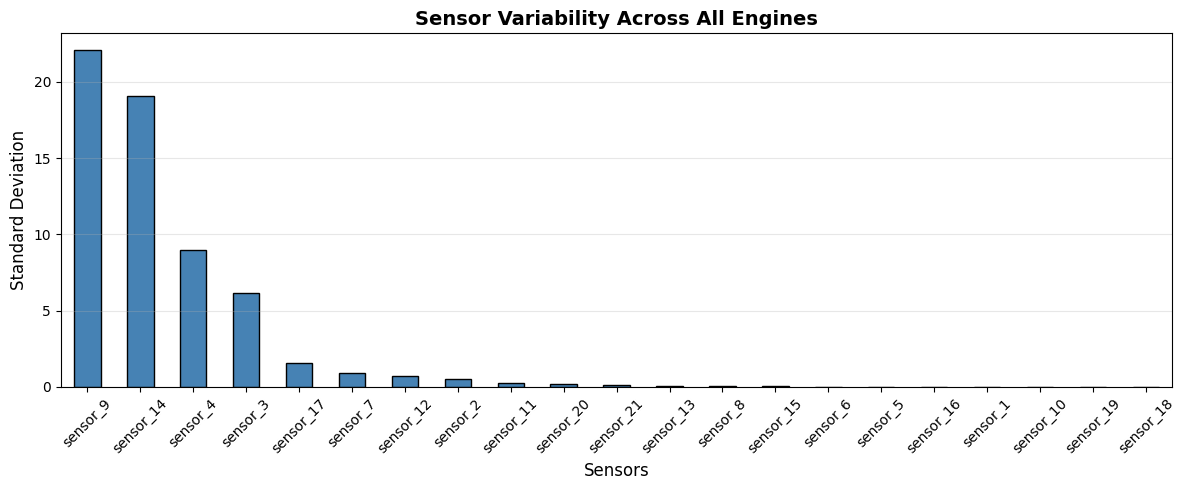


We should consider removing 7 low-variance sensors
They don't provide useful information for prediction.


In [7]:
# Calculate standard deviation for each sensor across all engines
sensor_columns = [col for col in train_df.columns if col.startswith('sensor_')]
sensor_std = train_df[sensor_columns].std()

print("-"*60)
print("SENSOR VARIABILITY ANALYSIS")
print("-"*60)

print("\nSensors with very low variability (likely not useful):")
low_variance_sensors = sensor_std[sensor_std < 0.01].index.tolist()
print(low_variance_sensors)

print("\nSensors with high variability (potentially useful):")
high_variance_sensors = sensor_std[sensor_std > 1].index.tolist()
print(high_variance_sensors)

# Visualize sensor variability
plt.figure(figsize=(12, 5))
sensor_std.sort_values(ascending=False).plot(kind='bar', color='steelblue', edgecolor='black')
plt.xlabel('Sensors', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.title('Sensor Variability Across All Engines', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nWe should consider removing {len(low_variance_sensors)} low-variance sensors")
print("They don't provide useful information for prediction.")

------------------------------------------------------------
REMAINING USEFUL LIFE (RUL) CALCULATION
------------------------------------------------------------

Example for Engine #1:
   unit_number  time_cycles  max_cycles  RUL
0            1            1         192  191
1            1            2         192  190
2            1            3         192  189
3            1            4         192  188
4            1            5         192  187
5            1            6         192  186
6            1            7         192  185
7            1            8         192  184
8            1            9         192  183
9            1           10         192  182

------------------------------------------------------------
RUL STATISTICS
------------------------------------------------------------
count    20631.000000
mean       107.807862
std         68.880990
min          0.000000
25%         51.000000
50%        103.000000
75%        155.000000
max        361.000000
Name:

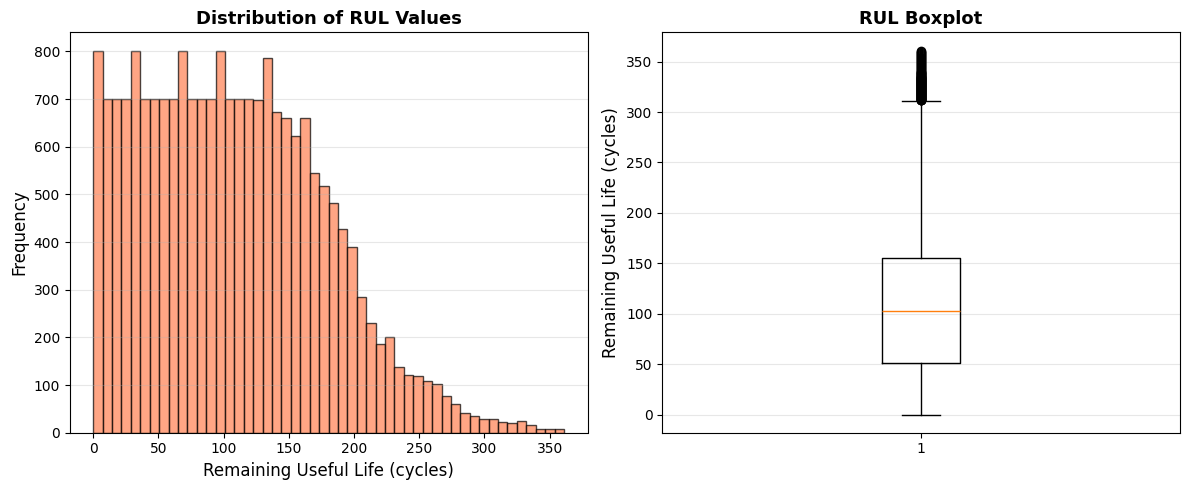


Interpretation:
- RUL starts at maximum (engine is new)
- RUL decreases to 0 (engine fails)


In [8]:
# Calculate RUL (Remaining Useful Life) for each row
# RUL = Maximum cycles for that engine - Current cycle

# Get max cycles for each engine
max_cycles = train_df.groupby('unit_number')['time_cycles'].max().reset_index()
max_cycles.columns = ['unit_number', 'max_cycles']

# Merge max_cycles back to the main dataframe
train_df = train_df.merge(max_cycles, on='unit_number', how='left')

# Calculate RUL
train_df['RUL'] = train_df['max_cycles'] - train_df['time_cycles']

print("-"*60)
print("REMAINING USEFUL LIFE (RUL) CALCULATION")
print("-"*60)

print("\nExample for Engine #1:")
print(train_df[train_df['unit_number'] == 1][['unit_number', 'time_cycles', 'max_cycles', 'RUL']].head(10))

print("\n" + "-"*60)
print("RUL STATISTICS")
print("-"*60)
print(train_df['RUL'].describe())

# Visualize RUL distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(train_df['RUL'], bins=50, edgecolor='black', alpha=0.7, color='coral')
plt.xlabel('Remaining Useful Life (cycles)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of RUL Values', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(train_df['RUL'], vert=True)
plt.ylabel('Remaining Useful Life (cycles)', fontsize=12)
plt.title('RUL Boxplot', fontsize=13, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- RUL starts at maximum (engine is new)")
print("- RUL decreases to 0 (engine fails)")